In [1]:
# Programmer : Qaidjohar Dama 
# College : Keystone SOE
# Class : TE-A
# Roll No : 13

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('banknotes.csv')

In [31]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [33]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [34]:
x = df.drop('Class', axis=1)

y = df['Class']

In [35]:
x.shape

(1372, 4)

<Axes: xlabel='Class', ylabel='count'>

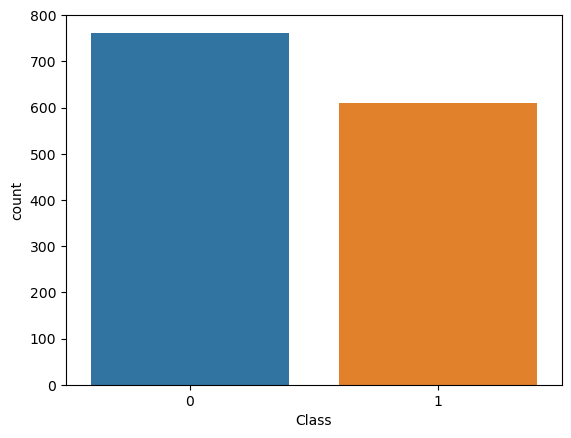

In [36]:
sns.countplot(x = y)

In [37]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.25)

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt = DecisionTreeClassifier()

In [42]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [43]:
y_pred = dt.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test, y_pred)

0.9883381924198251

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay    

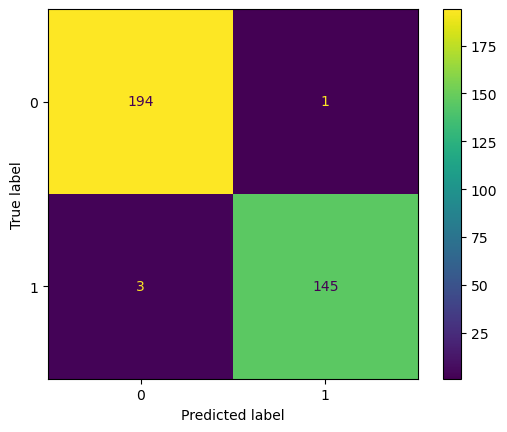

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [50]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       195
           1       0.99      0.98      0.99       148

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [53]:
from sklearn.tree import plot_tree

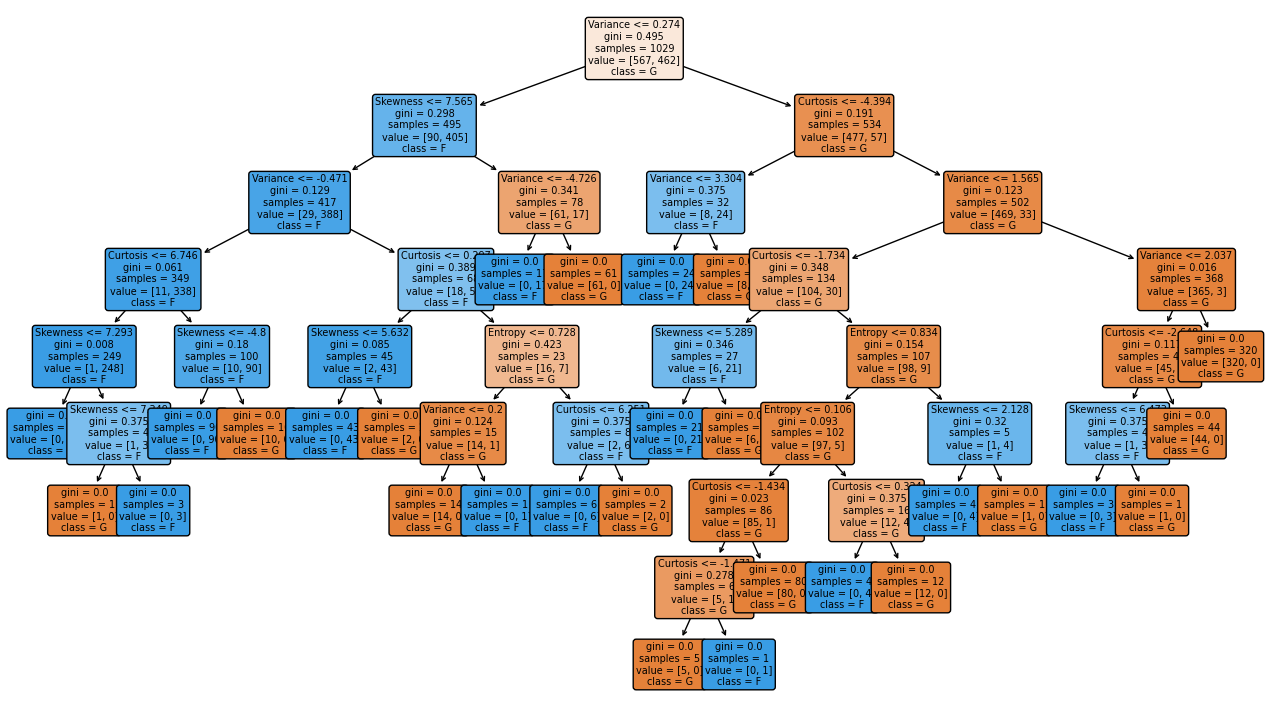

In [55]:
plt.figure(figsize=(16, 9))

plot_tree(dt, fontsize=7, filled=True, rounded=True,
          class_names=['G','F'],
          feature_names=x.columns);

In [62]:
imp = dt.feature_importances_

<BarContainer object of 4 artists>

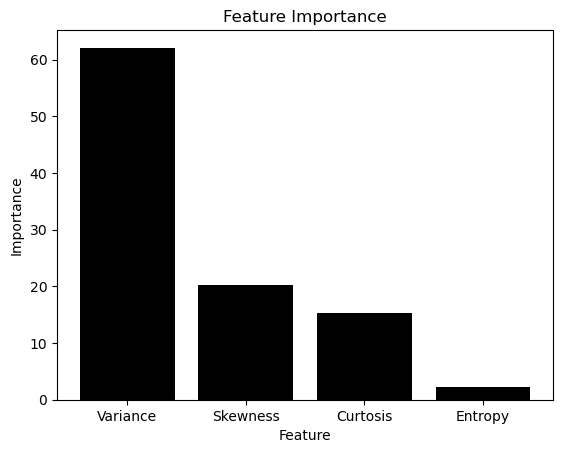

In [65]:
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.bar(x.columns, imp*100, color='black')